In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lars, ElasticNet, Lasso, Ridge, BayesianRidge
import os

pd.set_option('display.max_columns',500)
%matplotlib inline
pd.set_option('display.float_format', lambda x:"{:,.2f}".format(x))

In [3]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [4]:
def pema(y_true, y_pred):
    return np.sum((np.abs(y_true-y_pred))/y_true)*(1/len(y_true))

# Quitar Outlyers

In [5]:
def Quitar_outlyers(data_origen,var, enes=3):

    sigma = data_origen[var].std()
    media = data_origen[var].mean()
    lim_inf  = media - enes*sigma
    lim_sup = media + enes*sigma
    
    return lim_inf,lim_sup

# Red wine analysis

In [6]:
tgt = "quality"
ls_pred = [x for x in red.columns if x not in [tgt]]

In [7]:
print(red.shape)

(1599, 12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B6A607F0>,
      dtype=object)

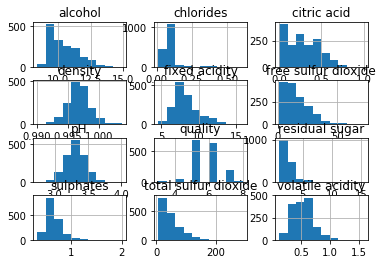

In [8]:
red.hist()

In [9]:
##Se quitan datos atipicos
for var_cont_i in ls_pred:
    Cota_Inf_r, Cota_Sup_r = Quitar_outlyers(red,var_cont_i,4)
    red = red[(Cota_Inf_r <= red[var_cont_i]) & (red[var_cont_i] <= Cota_Sup_r)]

In [10]:
print(red.shape)

(1536, 12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B69FB588>,
      dtype=object)

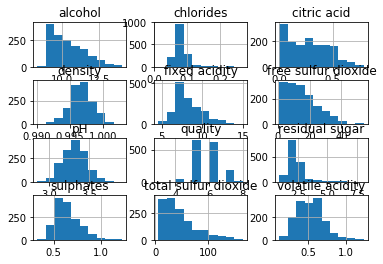

In [11]:
red.hist()

In [12]:
xr = red[ls_pred].copy()
yr = red[tgt]
dc_scores = {} 

# Regresión lineal

In [13]:
linreg = LinearRegression()

In [14]:
linreg.fit(xr,yr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
ls_res = cross_val_score(estimator=linreg, X=xr, y=yr, cv=10, n_jobs=-1, scoring='r2')

In [16]:
np.mean(ls_res), np.std(ls_res)

(0.2825881176897552, 0.1411772229953308)

In [17]:
linreg.intercept_

20.053675817537563

In [18]:
linreg.coef_

array([ 2.63584007e-02, -1.01687283e+00, -3.00861724e-01,  4.26915089e-03,
       -1.77221353e+00,  3.73990719e-03, -3.12655539e-03, -1.56994599e+01,
       -5.83192493e-01,  1.23619898e+00,  2.86309872e-01])

In [19]:
dc_scores.update({str(linreg).split('(')[0]:np.mean(ls_res)})

In [20]:
dc_scores

{'LinearRegression': 0.2825881176897552}

# Regresión LARS

In [21]:
larsreg = Lars()

In [22]:
larsreg.fit(xr,yr)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [23]:
ls_res=cross_val_score(estimator=larsreg, X=xr, y=yr, cv=4, n_jobs=-1, scoring='r2')

In [24]:
np.mean(ls_res), np.std(ls_res)

(0.325488947870561, 0.05425158483237728)

In [25]:
larsreg.intercept_

20.0536758175374

In [26]:
larsreg.coef_

array([ 2.63584007e-02, -1.01687283e+00, -3.00861724e-01,  4.26915089e-03,
       -1.77221353e+00,  3.73990719e-03, -3.12655539e-03, -1.56994599e+01,
       -5.83192493e-01,  1.23619898e+00,  2.86309872e-01])

In [27]:
dc_scores.update({str(larsreg).split('(')[0]:np.mean(ls_res)})

In [28]:
dc_scores

{'LinearRegression': 0.2825881176897552, 'Lars': 0.325488947870561}

# Regresión Ridge

In [29]:
ridreg = Ridge(alpha=0)

In [30]:
ridreg.fit(xr,yr)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
ls_res=cross_val_score(estimator=ridreg, X=xr, y=yr, cv=4, n_jobs=-1, scoring='r2')

In [32]:
np.mean(ls_res), np.std(ls_res)

(0.3254889478705617, 0.054251584832376805)

In [33]:
larsreg.intercept_

20.0536758175374

In [34]:
larsreg.coef_

array([ 2.63584007e-02, -1.01687283e+00, -3.00861724e-01,  4.26915089e-03,
       -1.77221353e+00,  3.73990719e-03, -3.12655539e-03, -1.56994599e+01,
       -5.83192493e-01,  1.23619898e+00,  2.86309872e-01])

In [35]:
dc_scores.update({str(ridreg).split('(')[0]:np.mean(ls_res)})

In [36]:
dc_scores

{'LinearRegression': 0.2825881176897552,
 'Lars': 0.325488947870561,
 'Ridge': 0.3254889478705617}

In [37]:
str(larsreg).split('(')[0]

'Lars'

# Regresión Lasso

In [38]:
lasso = Lasso()

In [39]:
lasso.fit(xr,yr)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
ls_res=cross_val_score(estimator=lasso, X=xr, y=yr, cv=4, n_jobs=-1, scoring='r2')

In [41]:
np.mean(ls_res), np.std(ls_res)

(-0.01487358462863142, 0.06323955150628262)

In [42]:
larsreg.intercept_

20.0536758175374

In [43]:
larsreg.coef_

array([ 2.63584007e-02, -1.01687283e+00, -3.00861724e-01,  4.26915089e-03,
       -1.77221353e+00,  3.73990719e-03, -3.12655539e-03, -1.56994599e+01,
       -5.83192493e-01,  1.23619898e+00,  2.86309872e-01])

In [44]:
dc_scores.update({str(lasso).split('(')[0]:np.mean(ls_res)})

In [45]:
dc_scores

{'LinearRegression': 0.2825881176897552,
 'Lars': 0.325488947870561,
 'Ridge': 0.3254889478705617,
 'Lasso': -0.01487358462863142}

# Red elástica

In [46]:
elas = ElasticNet()

In [47]:
elas.fit(xr,yr)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
ls_res=cross_val_score(estimator=elas, X=xr, y=yr, cv=4, n_jobs=-1, scoring='r2')

In [49]:
np.mean(ls_res), np.std(ls_res)

(-0.009874002848524577, 0.06604714995912343)

In [50]:
larsreg.intercept_

20.0536758175374

In [51]:
larsreg.coef_

array([ 2.63584007e-02, -1.01687283e+00, -3.00861724e-01,  4.26915089e-03,
       -1.77221353e+00,  3.73990719e-03, -3.12655539e-03, -1.56994599e+01,
       -5.83192493e-01,  1.23619898e+00,  2.86309872e-01])

In [52]:
dc_scores.update({str(elas).split('(')[0]:np.mean(ls_res)})

In [53]:
dc_scores

{'LinearRegression': 0.2825881176897552,
 'Lars': 0.325488947870561,
 'Ridge': 0.3254889478705617,
 'Lasso': -0.01487358462863142,
 'ElasticNet': -0.009874002848524577}

# Regresión Bayesiana

In [54]:
rb = BayesianRidge()

In [55]:
rb.fit(xr,yr)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [56]:
ls_res=cross_val_score(estimator=rb, X=xr, y=yr, cv=4, n_jobs=-1, scoring='r2')

In [57]:
np.mean(ls_res), np.std(ls_res)

(0.32676432593621807, 0.05381881714347032)

In [58]:
larsreg.intercept_

20.0536758175374

In [59]:
larsreg.coef_

array([ 2.63584007e-02, -1.01687283e+00, -3.00861724e-01,  4.26915089e-03,
       -1.77221353e+00,  3.73990719e-03, -3.12655539e-03, -1.56994599e+01,
       -5.83192493e-01,  1.23619898e+00,  2.86309872e-01])

In [60]:
dc_scores.update({str(rb).split('(')[0]:np.mean(ls_res)})

In [61]:
dc_scores

{'LinearRegression': 0.2825881176897552,
 'Lars': 0.325488947870561,
 'Ridge': 0.3254889478705617,
 'Lasso': -0.01487358462863142,
 'ElasticNet': -0.009874002848524577,
 'BayesianRidge': 0.32676432593621807}

In [62]:
resul = pd.DataFrame(columns=[])
alfas = pd.DataFrame(columns=[])
for model in [linreg, larsreg, ridreg, lasso, elas, rb]:
    resul[str(model).split("(")[0]] = model.coef_
    alfas[str(model).split("(")[0]] = [model.intercept_]

In [63]:
resul["features"] = xr.columns
resul = resul.set_index("features")
alfas["features"] = ["intercepto"]
alfas = alfas.set_index("features")

In [64]:
resul = alfas.append(resul)

In [65]:
resul

,LinearRegression,Lars,Ridge,Lasso,ElasticNet,BayesianRidge
features,,,,,,
intercepto,20.05,20.05,20.05,5.85,5.86,4.37
fixed acidity,0.03,0.03,0.03,0.00,0.00,0.01
volatile acidity,-1.02,-1.02,-1.02,-0.00,-0.00,-1.02
citric acid,-0.30,-0.30,-0.30,0.00,0.00,-0.27
residual sugar,0.00,0.00,0.00,0.00,0.00,-0.01
chlorides,-1.77,-1.77,-1.77,-0.00,-0.00,-0.81
free sulfur dioxide,0.00,0.00,0.00,0.00,0.00,0.00
total sulfur dioxide,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00
density,-15.70,-15.70,-15.70,-0.00,-0.00,-0.02


# Ajustes de lambdas

In [66]:
alphas = [x/100 for x in range(0,100,5)]

In [67]:
lambdas = []
means = []
stds = []
modelos = []
pemas = []

In [68]:
for a in alphas:
    models = ['Ridge', 'Lasso', 'Elastic']
    mod = {'Ridge':Ridge(alpha=a), 'Lasso':Lasso(alpha=a), 'Elastic':ElasticNet(alpha=a)}
    for m in models:
        mod[m].fit(xr,yr)
        ls_res=cross_val_score(estimator=mod[m], X=xr, y=yr, cv=4, n_jobs=-1, scoring='r2')
        means.append(np.mean(ls_res))
        stds.append(np.std(ls_res))
        lambdas.append(a)
        modelos.append(m)
        pemas.append(pema(yr,mod[m].predict(xr)))

C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate

In [69]:
auxr = pd.DataFrame()
auxr['Modelo'] = modelos
auxr['Lambda'] = lambdas
auxr['Medias'] = means
auxr['Desviación estándar'] = stds
auxr['Pema'] = pemas
auxr.head()

,Modelo,Lambda,Medias,Desviación estándar,Pema
0,Ridge,0.00,0.33,0.05,0.09
1,Lasso,0.00,0.33,0.05,0.09
2,Elastic,0.00,0.33,0.05,0.09
3,Ridge,0.05,0.33,0.05,0.09
4,Lasso,0.05,0.22,0.05,0.10


In [70]:
auxr.sort_values(by='Medias', ascending=False).head()

,Modelo,Lambda,Medias,Desviación estándar,Pema
24,Ridge,0.40,0.33,0.05,0.09
27,Ridge,0.45,0.33,0.05,0.09
21,Ridge,0.35,0.33,0.05,0.09
30,Ridge,0.50,0.33,0.05,0.09
18,Ridge,0.30,0.33,0.05,0.09


# White wine analysis

In [71]:
tgt = "quality"
ls_pred = [x for x in white.columns if x not in [tgt]]

In [72]:
boston = load_boston()
x = white[ls_pred].copy()
y = white[tgt]
dc_scores = {} 

In [73]:
print(white.shape)

(4898, 12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B7DC2080>,
      dtype=object)

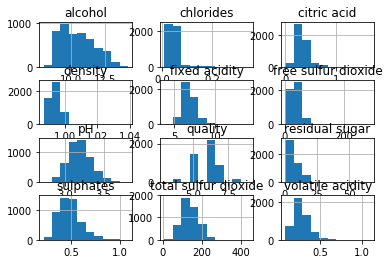

In [74]:
white.hist()

In [75]:
#Se quitan datos atipicos
for var_cont_i in ls_pred:
    
    Cota_Inf_w, Cota_Sup_w = Quitar_outlyers(white,var_cont_i,4)
    white = white[(Cota_Inf_w <= white[var_cont_i]) & (white[var_cont_i] <= Cota_Sup_w)]

In [76]:
print(white.shape)

(4738, 12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B820C240>,
      dtype=object)

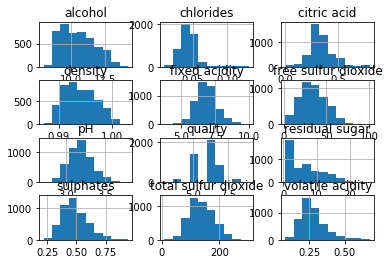

In [77]:
white.hist()

# Regresión lineal

In [78]:
linreg = LinearRegression()

In [79]:
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
ls_res = cross_val_score(estimator=linreg, X=x, y=y, cv=10, n_jobs=-1, scoring='r2')

In [81]:
np.mean(ls_res), np.std(ls_res)

(0.24979103983582532, 0.06386113866218429)

In [82]:
linreg.intercept_

150.19284248121

In [83]:
linreg.coef_

array([ 6.55199614e-02, -1.86317709e+00,  2.20902007e-02,  8.14828026e-02,
       -2.47276537e-01,  3.73276519e-03, -2.85747419e-04, -1.50284181e+02,
        6.86343742e-01,  6.31476473e-01,  1.93475697e-01])

In [84]:
dc_scores.update({str(linreg).split('(')[0]:np.mean(ls_res)})

In [85]:
dc_scores

{'LinearRegression': 0.24979103983582532}

# Regresión LARS

In [86]:
larsreg = Lars()

In [87]:
larsreg.fit(x,y)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [88]:
ls_res=cross_val_score(estimator=larsreg, X=x, y=y, cv=4, n_jobs=-1, scoring='r2')

In [89]:
np.mean(ls_res), np.std(ls_res)

(0.0749347606902924, 0.2286983226915712)

In [90]:
larsreg.intercept_

179.60233652109847

In [91]:
larsreg.coef_

array([ 9.85944908e-02, -1.85327774e+00,  1.76402388e-02,  9.34934317e-02,
       -1.04191227e-01,  3.83788581e-03, -3.17500465e-04, -1.80320348e+02,
        8.25111207e-01,  6.89669301e-01,  1.61683376e-01])

In [92]:
dc_scores.update({str(larsreg).split('(')[0]:np.mean(ls_res)})

In [93]:
dc_scores

{'LinearRegression': 0.24979103983582532, 'Lars': 0.0749347606902924}

# Regresión Ridge

In [94]:
ridreg = Ridge()

In [95]:
ridreg.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [96]:
ls_res=cross_val_score(estimator=ridreg, X=x, y=y, cv=4, n_jobs=-1, scoring='r2')

In [97]:
np.mean(ls_res), np.std(ls_res)

(0.22912117432938733, 0.06871256232786657)

In [98]:
larsreg.intercept_

179.60233652109847

In [99]:
larsreg.coef_

array([ 9.85944908e-02, -1.85327774e+00,  1.76402388e-02,  9.34934317e-02,
       -1.04191227e-01,  3.83788581e-03, -3.17500465e-04, -1.80320348e+02,
        8.25111207e-01,  6.89669301e-01,  1.61683376e-01])

In [100]:
dc_scores.update({str(ridreg).split('(')[0]:np.mean(ls_res)})

In [101]:
dc_scores

{'LinearRegression': 0.24979103983582532,
 'Lars': 0.0749347606902924,
 'Ridge': 0.22912117432938733}

In [102]:
str(larsreg).split('(')[0]

'Lars'

# Regresión Lasso

In [103]:
lasso = Lasso()

In [104]:
lasso.fit(x,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
ls_res=cross_val_score(estimator=lasso, X=x, y=y, cv=4, n_jobs=-1, scoring='r2')

In [106]:
np.mean(ls_res), np.std(ls_res)

(0.017703674685833726, 0.017470400780313325)

In [107]:
larsreg.intercept_

179.60233652109847

In [108]:
larsreg.coef_

array([ 9.85944908e-02, -1.85327774e+00,  1.76402388e-02,  9.34934317e-02,
       -1.04191227e-01,  3.83788581e-03, -3.17500465e-04, -1.80320348e+02,
        8.25111207e-01,  6.89669301e-01,  1.61683376e-01])

In [109]:
dc_scores.update({str(lasso).split('(')[0]:np.mean(ls_res)})

In [110]:
dc_scores

{'LinearRegression': 0.24979103983582532,
 'Lars': 0.0749347606902924,
 'Ridge': 0.22912117432938733,
 'Lasso': 0.017703674685833726}

# Red elástica

In [111]:
elas = ElasticNet()

In [112]:
elas.fit(x,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
ls_res=cross_val_score(estimator=elas, X=x, y=y, cv=4, n_jobs=-1, scoring='r2')

In [114]:
np.mean(ls_res), np.std(ls_res)

(0.026555146227103532, 0.01094047255265413)

In [115]:
larsreg.intercept_

179.60233652109847

In [116]:
larsreg.coef_

array([ 9.85944908e-02, -1.85327774e+00,  1.76402388e-02,  9.34934317e-02,
       -1.04191227e-01,  3.83788581e-03, -3.17500465e-04, -1.80320348e+02,
        8.25111207e-01,  6.89669301e-01,  1.61683376e-01])

In [117]:
dc_scores.update({str(elas).split('(')[0]:np.mean(ls_res)})

In [118]:
dc_scores

{'LinearRegression': 0.24979103983582532,
 'Lars': 0.0749347606902924,
 'Ridge': 0.22912117432938733,
 'Lasso': 0.017703674685833726,
 'ElasticNet': 0.026555146227103532}

# Regresión Bayesiana

In [119]:
rb = BayesianRidge()

In [120]:
rb.fit(x,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [121]:
ls_res=cross_val_score(estimator=rb, X=x, y=y, cv=4, n_jobs=-1, scoring='r2')

In [122]:
np.mean(ls_res), np.std(ls_res)

(0.22898890276959932, 0.06896681698774859)

In [123]:
larsreg.intercept_

179.60233652109847

In [124]:
larsreg.coef_

array([ 9.85944908e-02, -1.85327774e+00,  1.76402388e-02,  9.34934317e-02,
       -1.04191227e-01,  3.83788581e-03, -3.17500465e-04, -1.80320348e+02,
        8.25111207e-01,  6.89669301e-01,  1.61683376e-01])

In [125]:
dc_scores.update({str(rb).split('(')[0]:np.mean(ls_res)})

In [126]:
dc_scores

{'LinearRegression': 0.24979103983582532,
 'Lars': 0.0749347606902924,
 'Ridge': 0.22912117432938733,
 'Lasso': 0.017703674685833726,
 'ElasticNet': 0.026555146227103532,
 'BayesianRidge': 0.22898890276959932}

In [127]:
resul = pd.DataFrame(columns=[])
alfas = pd.DataFrame(columns=[])
for model in [linreg, larsreg, ridreg, lasso, elas, rb]:
    resul[str(model).split("(")[0]] = model.coef_
    alfas[str(model).split("(")[0]] = [model.intercept_]

In [128]:
resul["features"] = x.columns
resul = resul.set_index("features")
alfas["features"] = ["intercepto"]
alfas = alfas.set_index("features")

In [129]:
resul = alfas.append(resul)

In [130]:
resul

,LinearRegression,Lars,Ridge,Lasso,ElasticNet,BayesianRidge
features,,,,,,
intercepto,150.19,179.60,2.24,6.30,6.34,2.19
fixed acidity,0.07,0.10,-0.05,-0.00,-0.00,-0.05
volatile acidity,-1.86,-1.85,-1.92,-0.00,-0.00,-1.91
citric acid,0.02,0.02,-0.03,0.00,0.00,-0.03
residual sugar,0.08,0.09,0.03,-0.00,-0.00,0.03
chlorides,-0.25,-0.10,-0.65,-0.00,-0.00,-0.60
free sulfur dioxide,0.00,0.00,0.00,0.00,0.01,0.00
total sulfur dioxide,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
density,-150.28,-180.32,-0.24,-0.00,-0.00,-0.19


# Ajustes de lambdas

In [131]:
alphas = [x/100 for x in range(0,100,5)]

In [132]:
lambdas = []
means = []
stds = []
modelos = []
pemas = []

In [133]:
for a in alphas:
    models = ['Ridge', 'Lasso', 'Elastic']
    mod = {'Ridge':Ridge(alpha=a), 'Lasso':Lasso(alpha=a), 'Elastic':ElasticNet(alpha=a)}
    for m in models:
        mod[m].fit(x,y)
        ls_res=cross_val_score(estimator=mod[m], X=x, y=y, cv=4, n_jobs=-1, scoring='r2')
        means.append(np.mean(ls_res))
        stds.append(np.std(ls_res))
        lambdas.append(a)
        modelos.append(m)
        pemas.append(pema(y,mod[m].predict(x)))

C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate

In [134]:
aux = pd.DataFrame()
aux['Modelo'] = modelos
aux['Lambda'] = lambdas
aux['Medias'] = means
aux['Desviación estándar'] = stds
aux['pemas'] = pemas
aux.head()

,Modelo,Lambda,Medias,Desviación estándar,pemas
0,Ridge,0.00,0.23,0.06,0.10
1,Lasso,0.00,0.23,0.06,0.10
2,Elastic,0.00,0.23,0.06,0.10
3,Ridge,0.05,0.23,0.07,0.10
4,Lasso,0.05,0.18,0.06,0.11


In [135]:
aux.sort_values(by='Medias', ascending=False).head()

,Modelo,Lambda,Medias,Desviación estándar,pemas
0,Ridge,0.00,0.23,0.06,0.10
2,Elastic,0.00,0.23,0.06,0.10
1,Lasso,0.00,0.23,0.06,0.10
3,Ridge,0.05,0.23,0.07,0.10
6,Ridge,0.10,0.23,0.07,0.10


# Alphas del mejor modelo red

In [136]:
#Debido a que los mejores parametros para ambos red y white son los mismos se instanciarán
#y se utilizará para ambos modelos
bestalphas=['R0','E0','L0','R0.5','R1']
modr = {'R0':Ridge(alpha=0), 'R0.5':Ridge(alpha=0.5), 'R1':Ridge(alpha=1),
       'E0':ElasticNet(alpha=0),'L0':Lasso(alpha=0)}

In [137]:
resul = pd.DataFrame(columns=[])
alfas = pd.DataFrame(columns=[])
for a in bestalphas:
    modr[a].fit(xr,yr)
    resul[a] = modr[a].coef_
    alfas[a] = [modr[a].intercept_] 

C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\bluetab\Anaconda3\lib\site-packages\skl

In [138]:
resul["features"] = xr.columns
resul = resul.set_index("features")
alfas["features"] = ["intercepto"]
alfas = alfas.set_index("features")
resul = alfas.append(resul)
resul
#R0, R0.5 y R1 son ridge, E0 es elastic net y L0 es lasso

,R0,E0,L0,R0.5,R1
features,,,,,
intercepto,20.05,20.05,20.05,4.52,4.38
fixed acidity,0.03,0.03,0.03,0.01,0.01
volatile acidity,-1.02,-1.02,-1.02,-1.03,-1.02
citric acid,-0.30,-0.30,-0.30,-0.29,-0.28
residual sugar,0.00,0.00,0.00,-0.01,-0.01
chlorides,-1.77,-1.77,-1.77,-1.16,-0.85
free sulfur dioxide,0.00,0.00,0.00,0.00,0.00
total sulfur dioxide,-0.00,-0.00,-0.00,-0.00,-0.00
density,-15.70,-15.70,-15.70,-0.03,-0.02


# Alphas del mejor modelo white

In [139]:
resul = pd.DataFrame(columns=[])
alfas = pd.DataFrame(columns=[])
for a in bestalphas:
    modr[a].fit(x,y)
    resul[a] = modr[a].coef_
    alfas[a] = [modr[a].intercept_] 

C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\bluetab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bluetab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\bluetab\Anaconda3\lib\site-packages\skl

In [140]:
resul["features"] = xr.columns
resul = resul.set_index("features")
alfas["features"] = ["intercepto"]
alfas = alfas.set_index("features")
resul = alfas.append(resul)
resul
#R0, R0.5 y R1 son ridge, E0 es elastic net y L0 es lasso

,R0,E0,L0,R0.5,R1
features,,,,,
intercepto,150.19,150.19,150.19,2.49,2.24
fixed acidity,0.07,0.07,0.07,-0.05,-0.05
volatile acidity,-1.86,-1.86,-1.86,-1.94,-1.92
citric acid,0.02,0.02,0.02,-0.03,-0.03
residual sugar,0.08,0.08,0.08,0.03,0.03
chlorides,-0.25,-0.25,-0.25,-0.77,-0.65
free sulfur dioxide,0.00,0.00,0.00,0.00,0.00
total sulfur dioxide,-0.00,-0.00,-0.00,-0.00,-0.00
density,-150.28,-150.28,-150.28,-0.47,-0.24
